# Step Forward Cross Validation for Bioactivity Prediction

## Plotting Chemical Space wrt Split type

In [1]:
import os

os.chdir('../sfcv/')
from datasplit import SortedStepForwardCV, UnsortedStepForwardCV, ScaffoldSplitCV, RandomSplitCV

os.chdir('../notebook/')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../benchmark/data/processed/target_CHEMBL253-3.Ki.csv")

In [4]:
cv_splitters = {
    "RandomSplit": RandomSplitCV(frac_train=0.9, n_folds=10, seed=69420),
    "ScaffoldSplit": ScaffoldSplitCV(smiles_col='standardized_smiles', n_folds=10,
                                     frac_train=0.9, seed=69420, include_chirality=False),
    "SortedStepForward": SortedStepForwardCV(sorting_col="LogD", ideal=2, n_bins=10, ascending=False),
    "UnsortedStepForward": UnsortedStepForwardCV(n_bins=10, random_state=69420)
}

In [5]:
def add_cv_split_columns(df, cv_splitters):
    df = df.copy()

    # Iterate over each split type
    for split_name, cv_splitter in cv_splitters.items():
        # Iterate over folds
        for fold_idx, (train_idx, test_idx) in enumerate(cv_splitter.split(df), start=1):
            col_name = f"{split_name}_Fold_{fold_idx}"  # Create column name

            # Initialize all entries as "None"
            df[col_name] = "None"

            # Assign "Train" and "Test" labels
            df.loc[train_idx, col_name] = "Train"
            df.loc[test_idx, col_name] = "Test"

    return df

In [6]:
df_splits = add_cv_split_columns(df, cv_splitters)

/Users/manasmahale/projects/sfcv/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [7]:
df_splits

,assay_chembl_id,compound_chembl_id,canonical_smiles,pchembl_value,standardized_smiles,LogD,LogP,MCE18,RandomSplit_Fold_1,RandomSplit_Fold_2,...,SortedStepForward_Fold_9,UnsortedStepForward_Fold_1,UnsortedStepForward_Fold_2,UnsortedStepForward_Fold_3,UnsortedStepForward_Fold_4,UnsortedStepForward_Fold_5,UnsortedStepForward_Fold_6,UnsortedStepForward_Fold_7,UnsortedStepForward_Fold_8,UnsortedStepForward_Fold_9
0,CHEMBL3705645,CHEMBL3686336,CC(C)(C)c1cn(C[C@H]2CCCO2)/c(=N/C(=O)c2cc(C(F)...,6.68,CC(C)(C)c1cn(C[C@H]2CCCO2)/c(=N/C(=O)c2cc(C(F)...,4.001379,4.9984,144.254200,Train,Train,...,Train,None,None,None,Test,Train,Train,Train,Train,Train
1,CHEMBL3705645,CHEMBL3686329,CC(C)NOc1ccc(C(F)(F)F)cc1C(=O)/N=c1\sc(C(C)(C)...,9.52,CC(C)NOc1ccc(C(F)(F)F)cc1C(=O)/N=c1\sc(C(C)(C)...,3.785342,5.0778,99.717172,Train,Test,...,Train,None,None,Test,Train,Train,Train,Train,Train,Train
2,CHEMBL3705645,CHEMBL3686328,CCN(CC)Oc1ccc(C(F)(F)F)cc1C(=O)/N=c1\sc(C(C)(C...,7.66,CCN(CC)Oc1ccc(C(F)(F)F)cc1C(=O)/N=c1\sc(C(C)(C...,4.291929,5.4216,99.566563,Train,Train,...,Train,None,None,None,Test,Train,Train,Train,Train,Train
3,CHEMBL3705645,CHEMBL3686305,COCCn1cc(C(C)(C)C)s/c1=N\C(=O)c1cc(C(F)(F)F)cc...,7.35,COCCn1cc(C(C)(C)C)s/c1=N\C(=O)c1cc(C(F)(F)F)cc...,3.755959,4.6224,69.000000,Train,Train,...,Train,None,None,None,None,None,None,None,Test,Train
4,CHEMBL3705645,CHEMBL3686306,CN1C(=O)CC[C@H]1COc1ccc(C(F)(F)F)cc1C(=O)/N=c1...,7.21,CN1C(=O)CC[C@H]1COc1ccc(C(F)(F)F)cc1C(=O)/N=c1...,3.083926,4.7856,151.958471,Train,Train,...,Train,None,None,Test,Train,Train,Train,Train,Train,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,CHEMBL906559,CHEMBL228404,CCCCCc1cc(O)cc(OCCCCCCCCCCCC(=O)NCCO)c1,7.41,CCCCCc1cc(O)cc(OCCCCCCCCCCCC(=O)NCCO)c1,4.675179,5.5132,7.000000,Train,Train,...,Train,None,None,None,None,Test,Train,Train,Train,Train
776,CHEMBL906559,CHEMBL228403,CCCCCc1cc(O)cc(OCCCCCCCCCCC(=O)NCc2ccc(OC)c(O)...,5.78,CCCCCc1cc(O)cc(OCCCCCCCCCCC(=O)NCc2ccc(OC)c(O)...,6.600751,7.0452,26.000000,Train,Train,...,Train,None,None,None,Test,Train,Train,Train,Train,Train
777,CHEMBL906559,CHEMBL228348,CCCCCc1cc(O)cc(OCCCCCCCCCCC(=O)NCC2CC2)c1,7.10,CCCCCc1cc(O)cc(OCCCCCCCCCCC(=O)NCC2CC2)c1,6.003684,6.5408,23.271111,Train,Train,...,Train,None,None,None,None,Test,Train,Train,Train,Train
778,CHEMBL906559,CHEMBL228347,CCCCCc1cc(O)cc(OCCCCCCCC(=O)NC2CC2)c1,7.41,CCCCCc1cc(O)cc(OCCCCCCCC(=O)NC2CC2)c1,4.571009,5.1229,23.509356,Train,Train,...,Train,None,None,None,None,None,None,Test,Train,Train


In [8]:
from chemplot import Plotter

cp = Plotter.from_smiles(df_splits["standardized_smiles"], target=df_splits["RandomSplit_Fold_8"], target_type="C")

sim_type indicates the similarity type by which the plots are constructed.
The supported similarity types are structural and tailored.
Because a target list has been provided 'tailored' as been selected as sym_type.


/Users/manasmahale/projects/sfcv/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [11]:
target_list = ["RandomSplit_Fold_9", "ScaffoldSplit_Fold_9", "SortedStepForward_Fold_9", "UnsortedStepForward_Fold_9"]

sim_type indicates the similarity type by which the plots are constructed.
The supported similarity types are structural and tailored.
Because a target list has been provided 'tailored' as been selected as sym_type.


/Users/manasmahale/projects/sfcv/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


<Axes: label='scatter', title={'center': 't-SNE plot'}, xlabel='t-SNE-1', ylabel='t-SNE-2'>

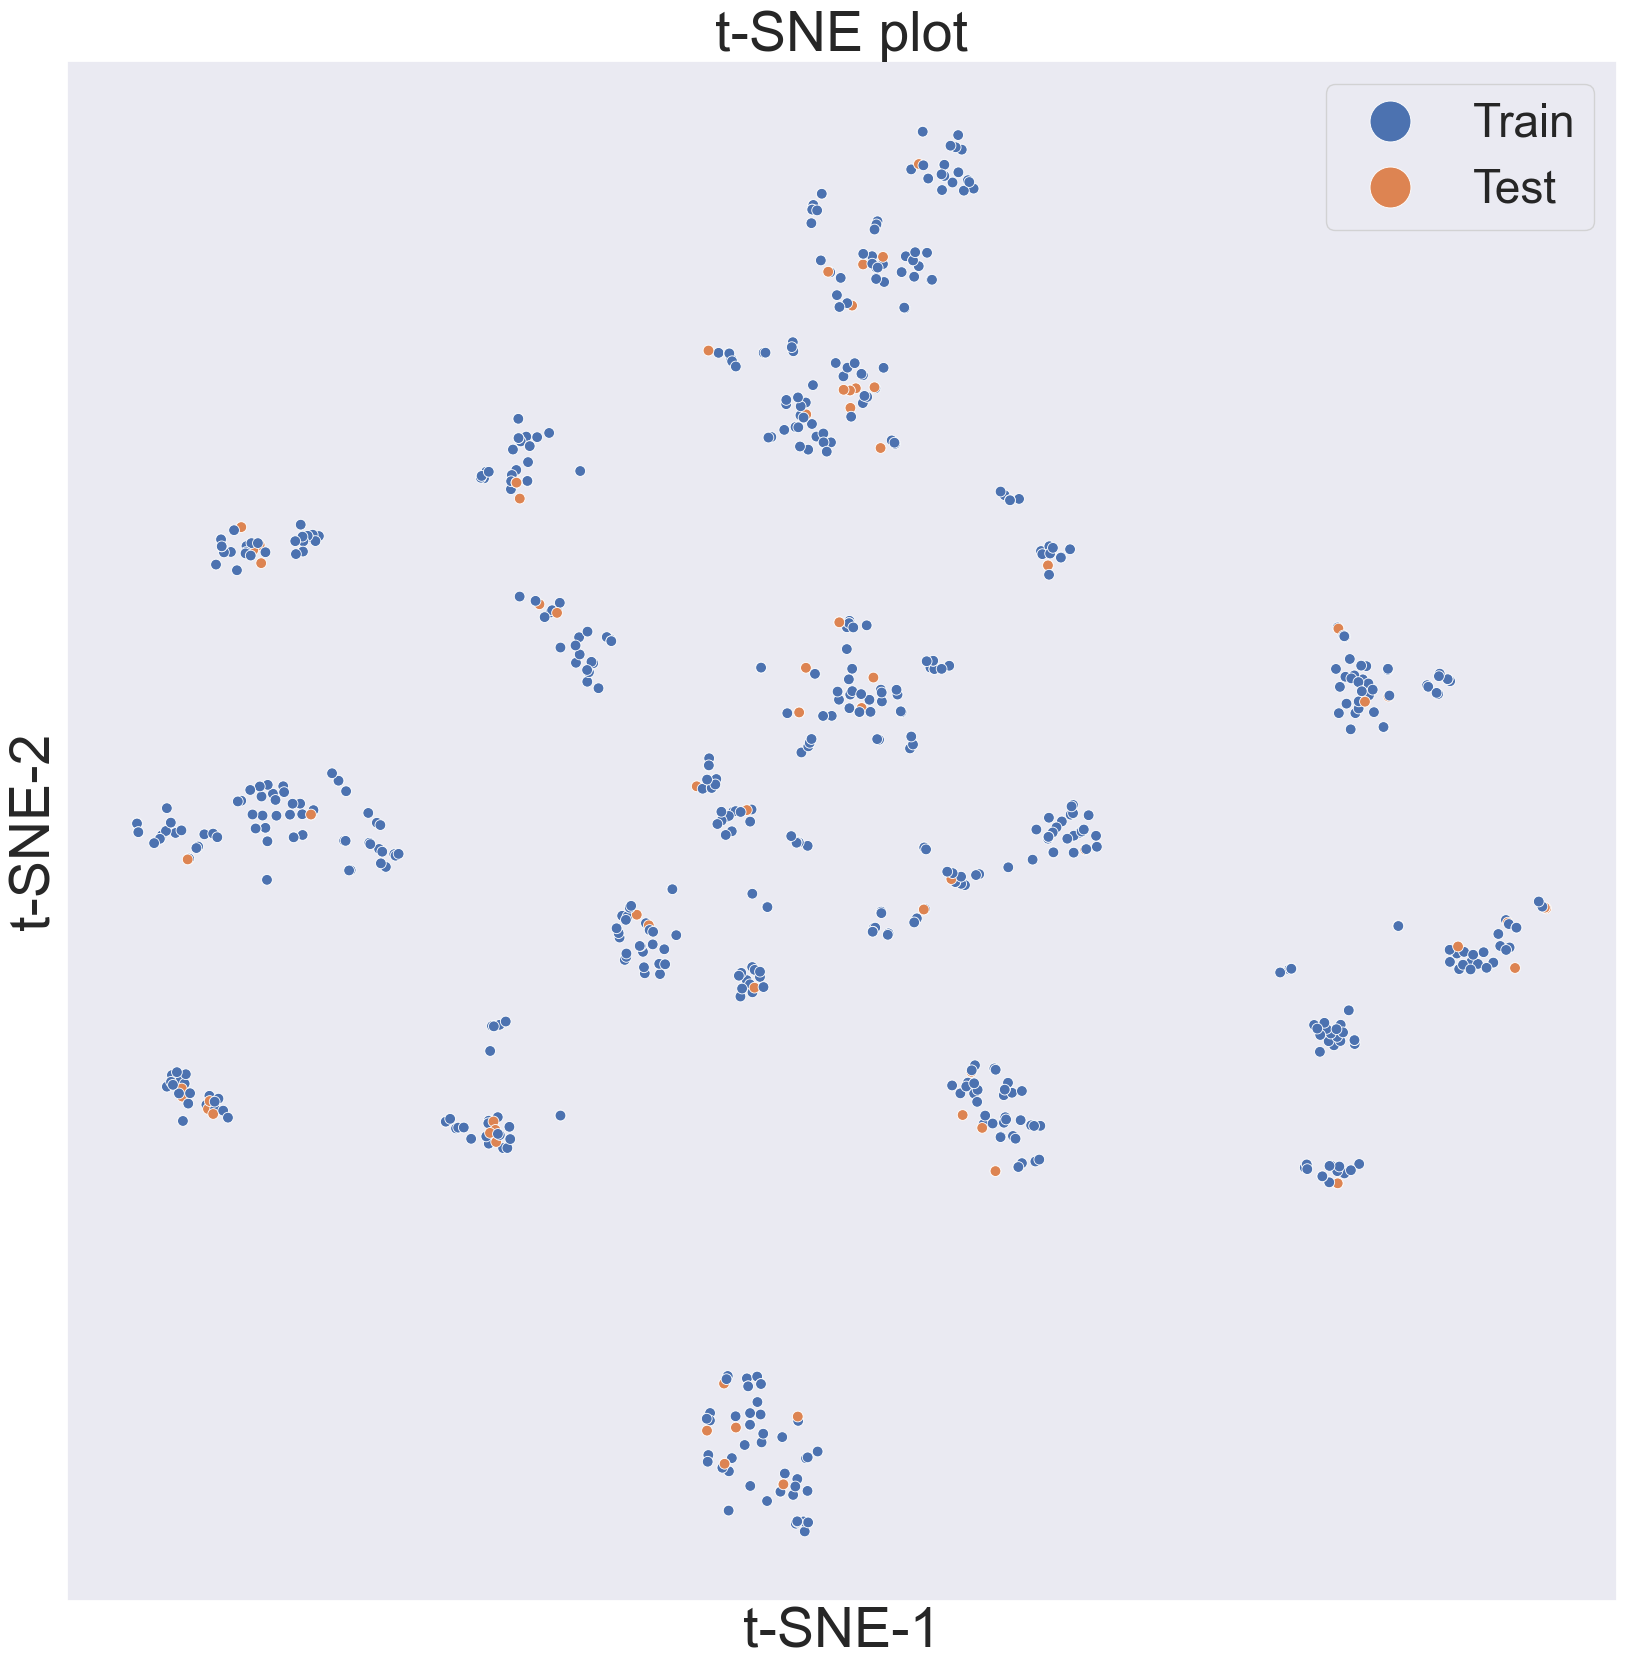

In [12]:
cp = Plotter.from_smiles(
    df_splits["standardized_smiles"],
    target=df_splits['RandomSplit_Fold_9'],
    target_type="C"  # Change to "C" or "D" as needed.
)
cp.tsne()
cp.visualize_plot()

sim_type indicates the similarity type by which the plots are constructed.
The supported similarity types are structural and tailored.
Because a target list has been provided 'tailored' as been selected as sym_type.


/Users/manasmahale/projects/sfcv/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


<Axes: label='scatter', title={'center': 't-SNE plot'}, xlabel='t-SNE-1', ylabel='t-SNE-2'>

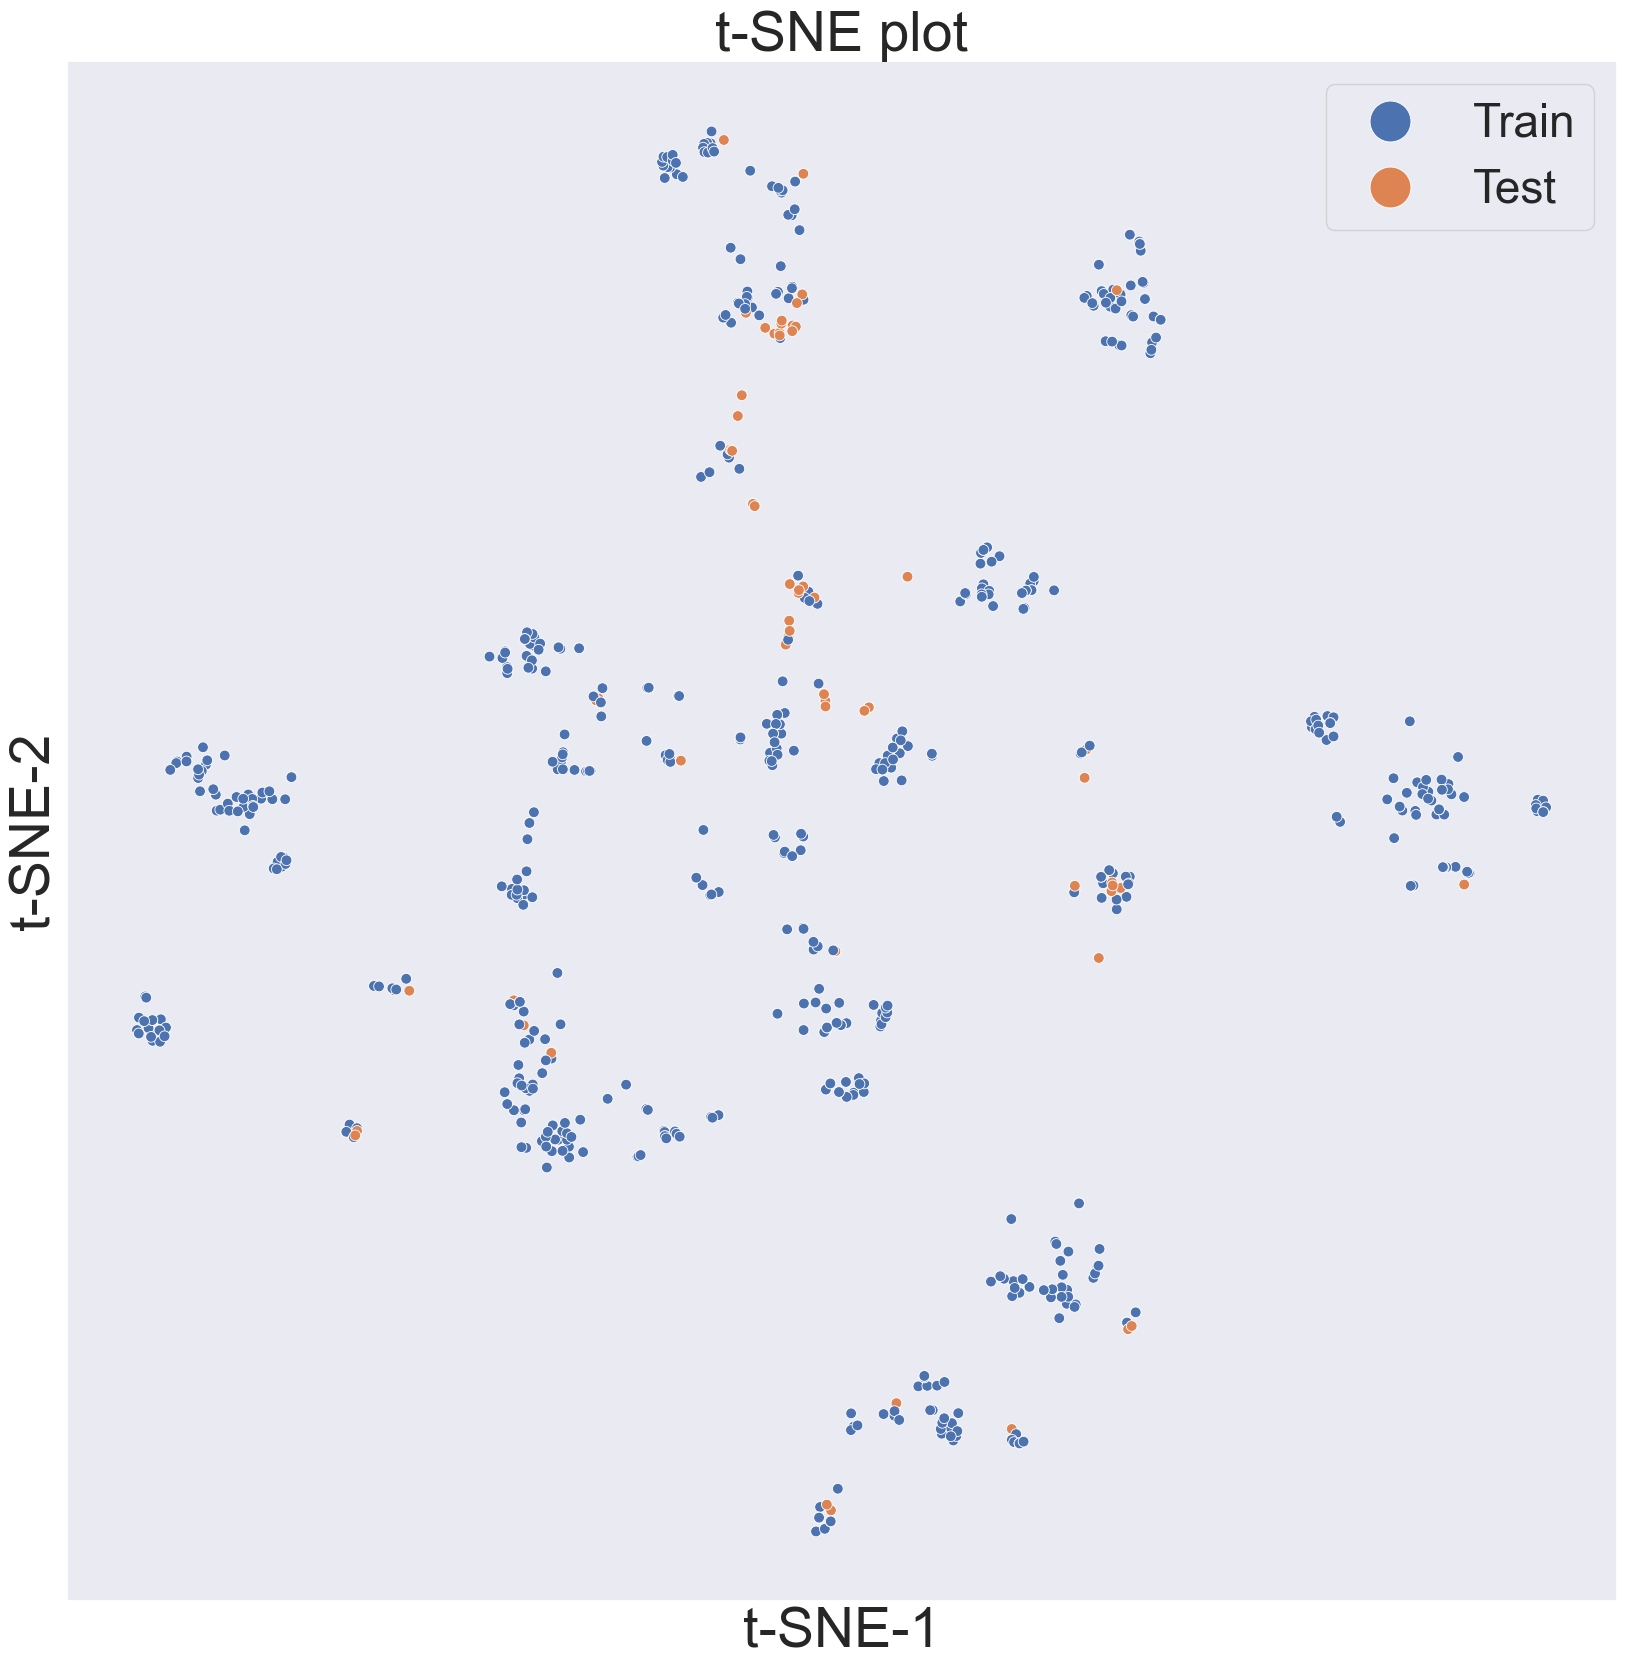

In [13]:
cp = Plotter.from_smiles(
    df_splits["standardized_smiles"],
    target=df_splits['ScaffoldSplit_Fold_9'],
    target_type="C"  # Change to "C" or "D" as needed.
)
cp.tsne()
cp.visualize_plot()

sim_type indicates the similarity type by which the plots are constructed.
The supported similarity types are structural and tailored.
Because a target list has been provided 'tailored' as been selected as sym_type.


/Users/manasmahale/projects/sfcv/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


<Axes: label='scatter', title={'center': 't-SNE plot'}, xlabel='t-SNE-1', ylabel='t-SNE-2'>

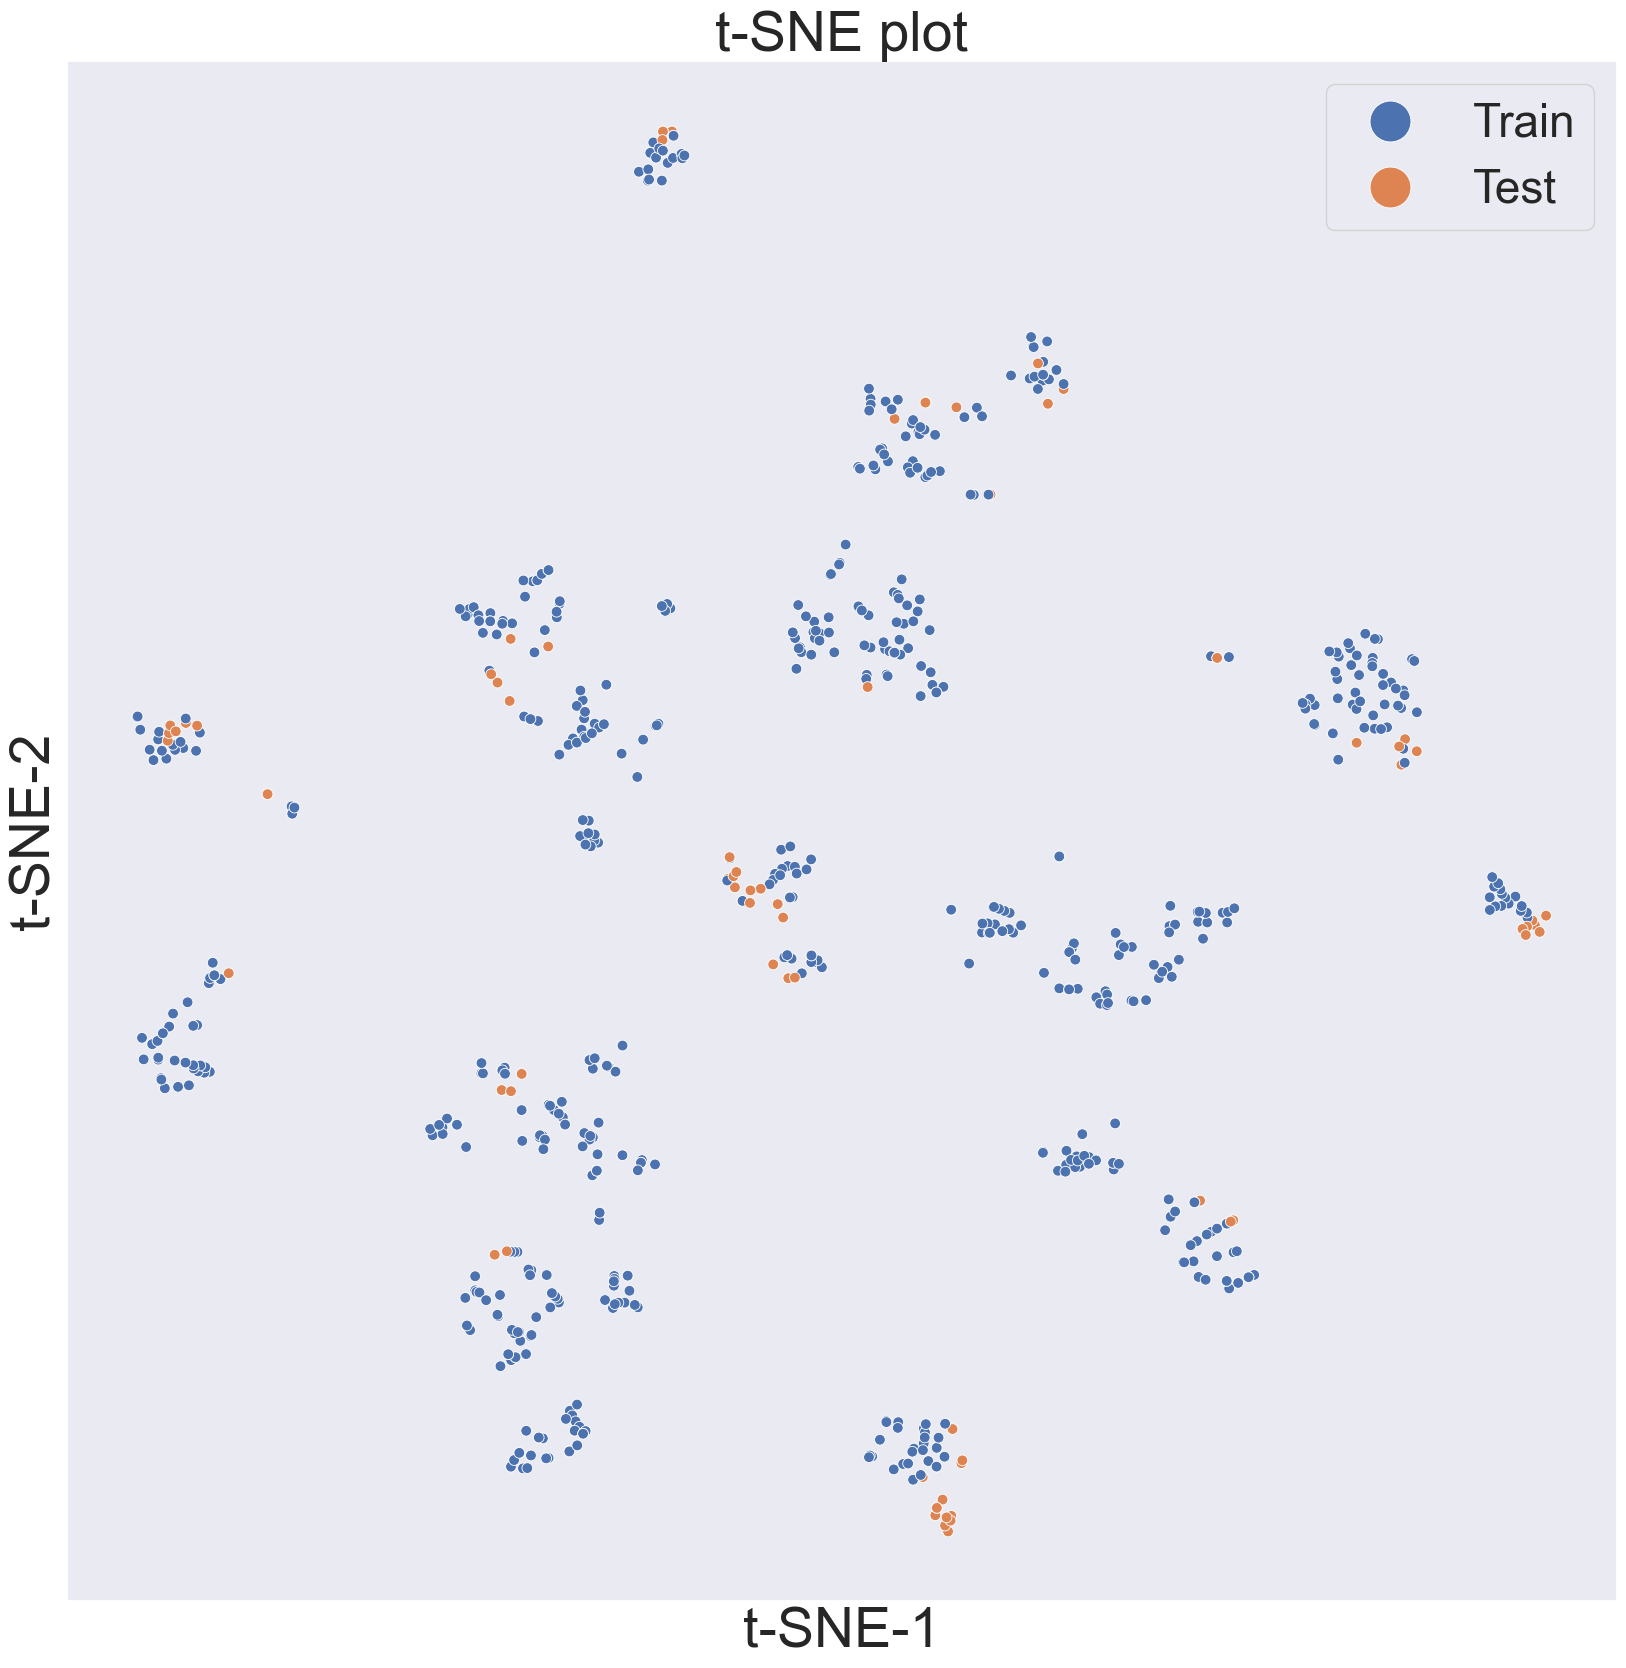

In [14]:
cp = Plotter.from_smiles(
    df_splits["standardized_smiles"],
    target=df_splits['SortedStepForward_Fold_9'],
    target_type="C"  # Change to "C" or "D" as needed.
)
cp.tsne()
cp.visualize_plot()

sim_type indicates the similarity type by which the plots are constructed.
The supported similarity types are structural and tailored.
Because a target list has been provided 'tailored' as been selected as sym_type.


/Users/manasmahale/projects/sfcv/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


<Axes: label='scatter', title={'center': 't-SNE plot'}, xlabel='t-SNE-1', ylabel='t-SNE-2'>

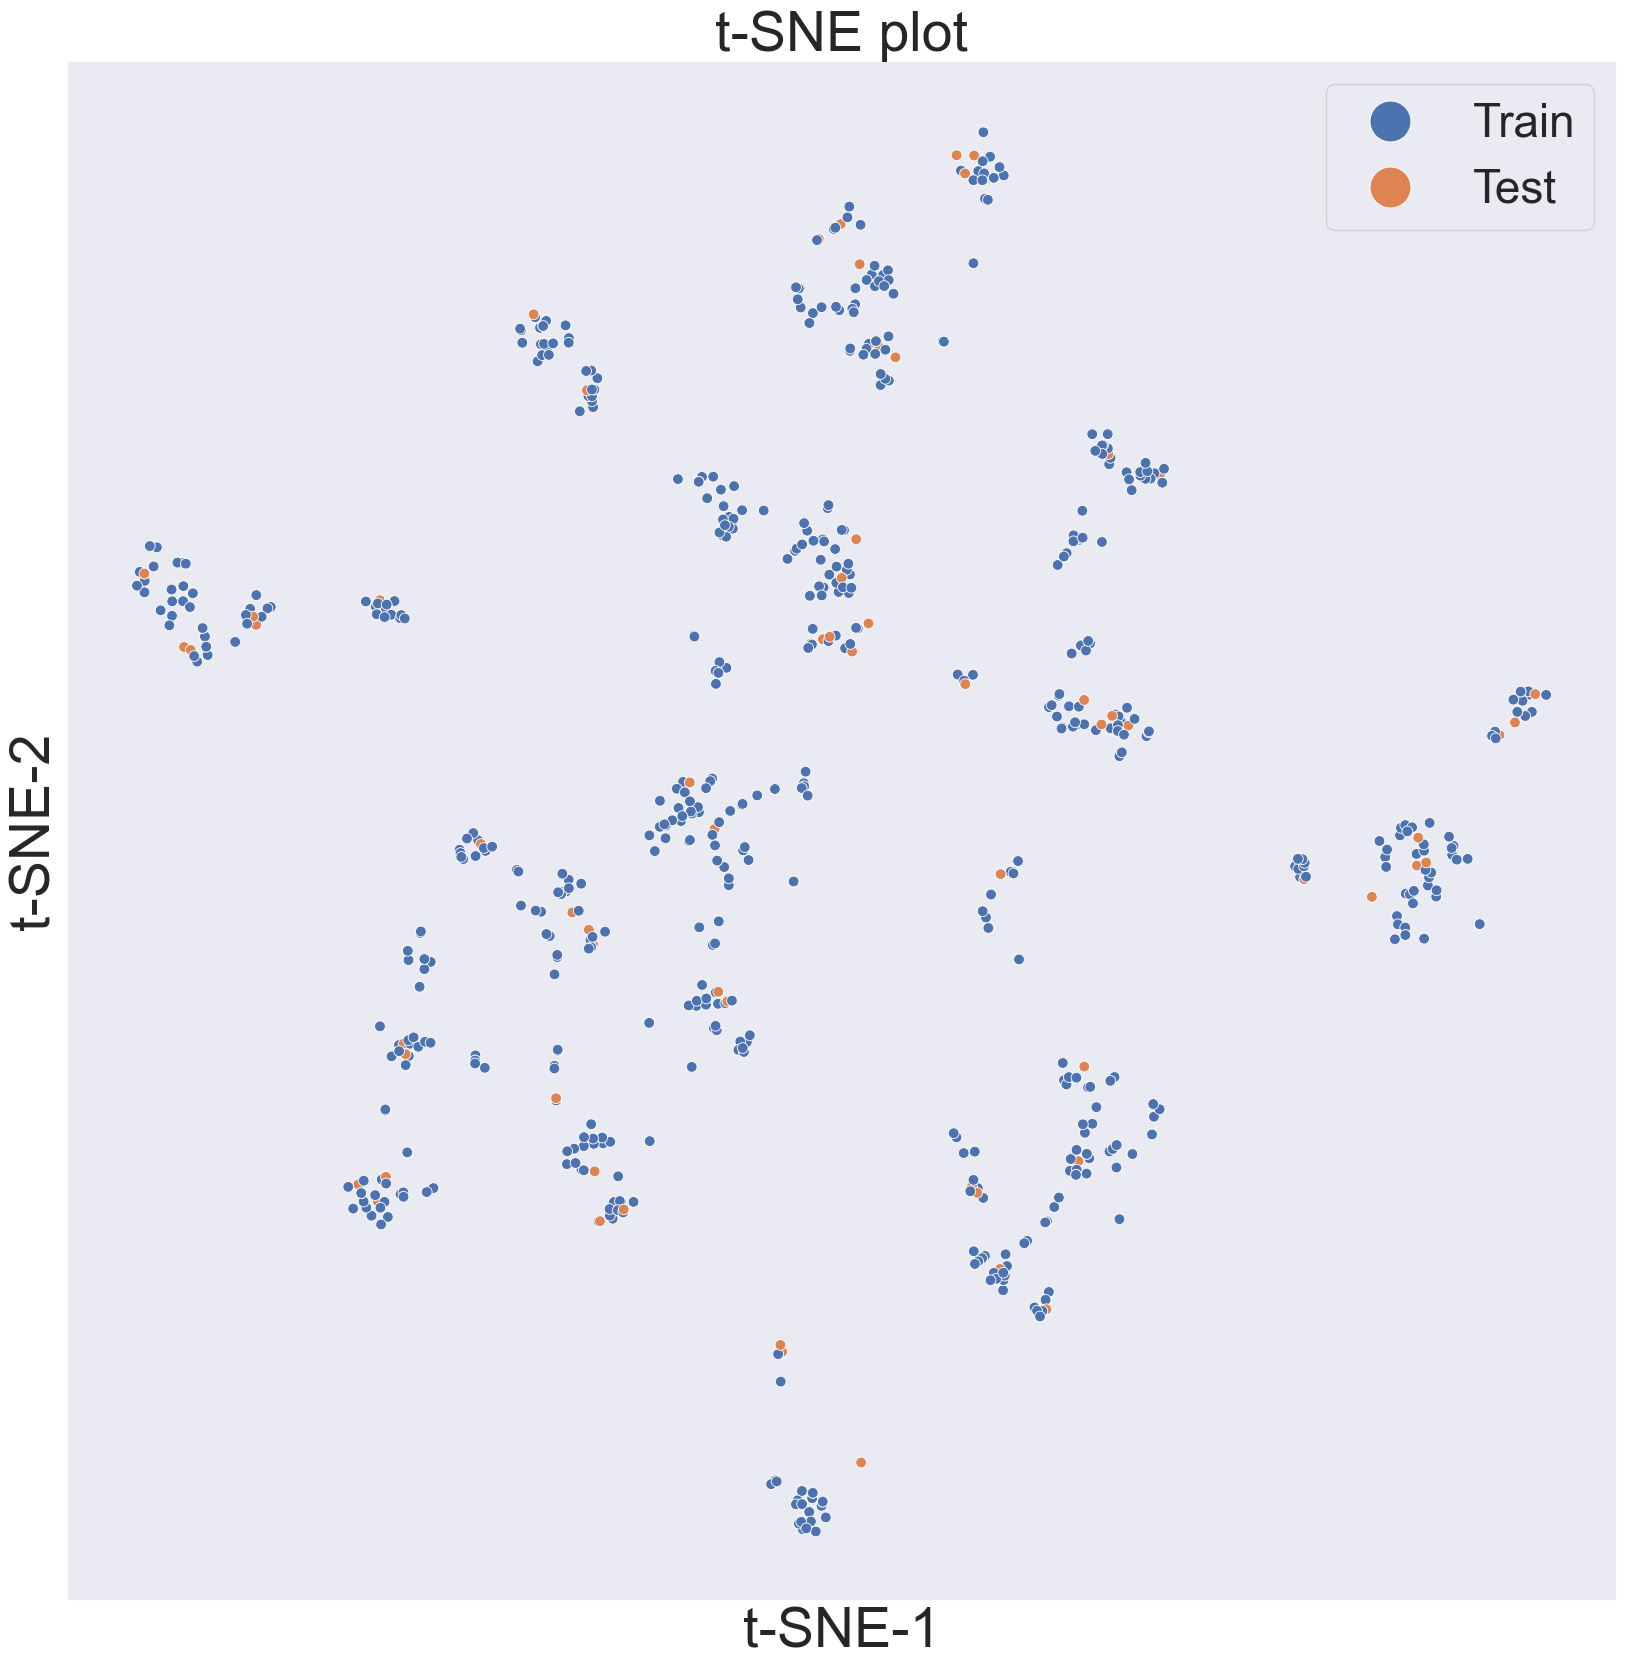

In [15]:
cp = Plotter.from_smiles(
    df_splits["standardized_smiles"],
    target=df_splits['UnsortedStepForward_Fold_9'],
    target_type="C"  # Change to "C" or "D" as needed.
)
cp.tsne()
cp.visualize_plot()